__________________

# KNN

____________________

In [1]:
import pandas as pd
import numpy as np

In [2]:
# import data dari csv
wine = pd.read_csv('white_wine2.csv')

In [3]:
# manmpilkan beberapa baris data awal
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
print("Dimensi Data : ",wine.shape,"\n")
print("Tipe Data :\n ",wine.dtypes,"\n")
print("Data Hilang :\n ",wine.isnull().sum())

Dimensi Data :  (4898, 12) 

Tipe Data :
  fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object 

Data Hilang :
  fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [5]:
# peubah penjelas yang digunakan
FITUR=['density','alcohol']

In [6]:
# definisikan peubah respon (skor>6 memiliki kualitas baik)
wine['label']=np.where(wine['quality']>6,1,0)

___________________________________

# EKSPLORASI DATA

________________________________

In [7]:
# library untuk eksplorasi data
import matplotlib.pyplot as plt

# Peubah Respon

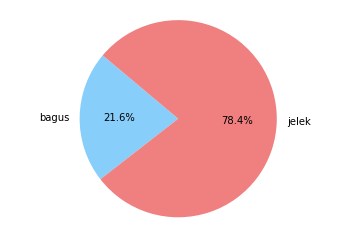

In [8]:
# menghitung ukuran diagram pie
ukuran = [sum(wine['label']),len(wine['label'])-sum(wine['label'])]

# menentukan label
labels = ['bagus','jelek']

# memilih warna 
color = ['lightskyblue','lightcoral']

# diagram pie
plt.pie(ukuran,labels=labels,colors=color,autopct='%1.1f%%',startangle=140)

plt.axis('equal')
plt.show()

# Peubah Penjelas

distribusi peubah

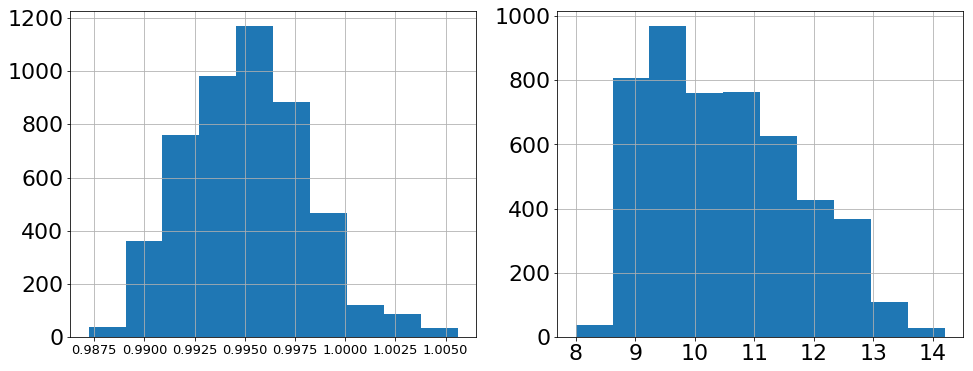

In [9]:
# mengatur ukuran gambar
plt.figure(figsize=(16,6))

# posis gambar pertama untuk peubah density
plt.subplot(1,2,1)
wine['density'].hist()
# mengatur ukuran huruf pada nilai-nilai di smbu x
plt.xticks(fontsize=13)
# mengatur ukuran huruf pada nilai-nilai di smbu y
plt.yticks(fontsize=22)

# posis gambar keuda untuk peubah alcohol
plt.subplot(1,2,2)
wine['alcohol'].hist()
# mengatur ukuran huruf pada nilai-nilai di smbu x
plt.xticks(fontsize=22)
# mengatur ukuran huruf pada nilai-nilai di smbu y
plt.yticks(fontsize=22)

plt.show()

distribusi peubah untuk masing-masing kualitas

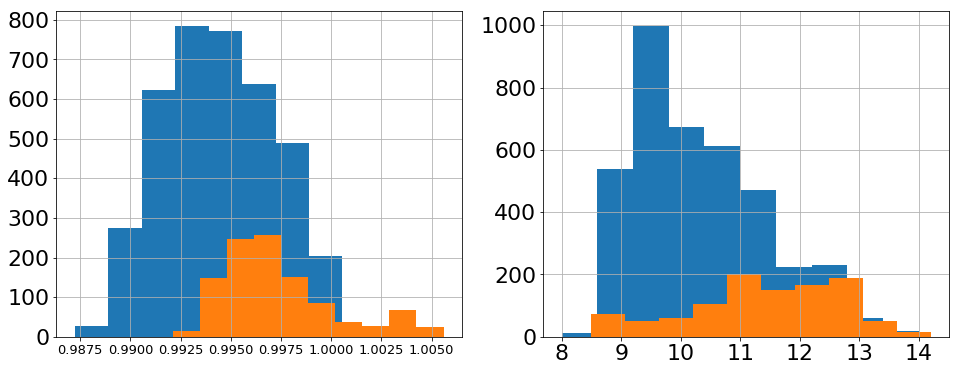

In [10]:
# mengatur ukuran gambar
plt.figure(figsize=(16,6))

# posis gambar pertama untuk peubah density
plt.subplot(1,2,1)
wine[wine['label']==0]['density'].hist()
wine[wine['label']==1]['density'].hist()
# mengatur ukuran huruf pada nilai-nilai di smbu x
plt.xticks(fontsize=13)
# mengatur ukuran huruf pada nilai-nilai di smbu y
plt.yticks(fontsize=22)

# posis gambar keuda untuk peubah alcohol
plt.subplot(1,2,2)
wine[wine['label']==0]['alcohol'].hist()
wine[wine['label']==1]['alcohol'].hist()
# mengatur ukuran huruf pada nilai-nilai di smbu x
plt.xticks(fontsize=22)
# mengatur ukuran huruf pada nilai-nilai di smbu y
plt.yticks(fontsize=22)

plt.show()

diagram pencar peubah alcohol dan density

In [11]:
# warna untuk membedakan masing-masn=ing kualitas
colormap = np.array(['red','blue'])

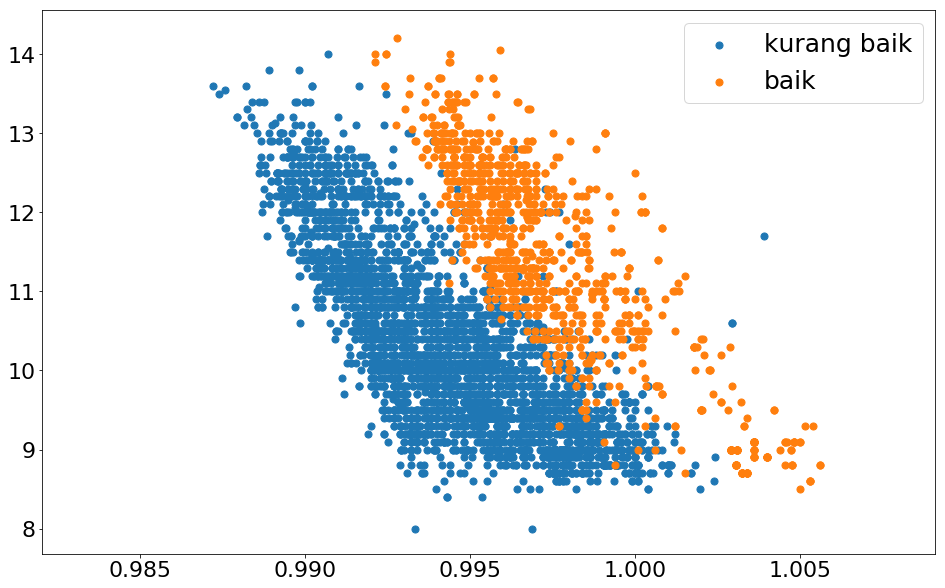

In [12]:
# mengatur ukuran gambar
plt.figure(figsize=(16,10))

# diagram pencar
plt.scatter(wine[wine['label']==0]['density'],wine[wine['label']==0]['alcohol'],marker='o',s=50)
plt.scatter(wine[wine['label']==1]['density'],wine[wine['label']==1]['alcohol'],marker='o',s=50)


# memunculkan keterangan
plt.legend(('kurang baik','baik'),loc='best',fontsize=25)

# mengatur ukuran huruf pada nilai-nilai di smbu x
plt.xticks(fontsize=22)
# mengatur ukuran huruf pada nilai-nilai di smbu y
plt.yticks(fontsize=22)


plt.show()

_____________________

# PENERAPAN METODE KNN

___________________

# Membagi Data Train dan Test

In [13]:
# library untuk membagi data
from sklearn.model_selection import train_test_split

In [14]:
# data dibagi menjadi 2 bagian, data traindan data tets
x_train,x_test,y_train,y_test = train_test_split(wine[FITUR],wine['label'],test_size=0.3,random_state=0,stratify=wine['label'])

In [15]:
# memunculkan dimensi masing-masing gugus data
print(x_train.shape)
print(x_test.shape)

(3428, 2)
(1470, 2)


# Standardisasi

In [16]:
# standardiasasi Z~N(0,1)
from sklearn.preprocessing import StandardScaler

In [17]:
# data yang digunakan untuk standardisasi peubah
sc = StandardScaler()
# data train
sc.fit(x_train)

# standardisasi data train
x_train_std = sc.transform(x_train)
# standardisasi data test
x_test_std = sc.transform(x_test)

# Penggunaan Awal Metode KNN

In [18]:
# library KNN
from sklearn.neighbors import KNeighborsClassifier
# library untuk evaluasi hasil prediksi
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report 

In [19]:
# Metode KNN dengan jarak euclidean dan sebanyak 5 tetangga
clf = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean')
clf.fit(x_train_std,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [20]:
print("Akurasi", accuracy_score(y_test,clf.predict(x_test_std)),"\n")
print("Recall", recall_score(y_test,clf.predict(x_test_std)),"\n")
print("Confusion Matrix :\n", confusion_matrix(y_test,clf.predict(x_test_std)),"\n")
print("Classification Report :\n", classification_report(y_test,clf.predict(x_test_std)),"\n")

Akurasi 0.965306122449 

Recall 0.918238993711 

Confusion Matrix :
 [[1127   25]
 [  26  292]] 

Classification Report :
              precision    recall  f1-score   support

          0       0.98      0.98      0.98      1152
          1       0.92      0.92      0.92       318

avg / total       0.97      0.97      0.97      1470
 



# Menentukan Banyaknya Tetangga (K)  Menggunakan Validasi

In [21]:
# menyediakan tempat untuk beberapa skor prediksi
test_score = []
train_score = []

# nilai k yang dicoba adalah 3 hingga 40
for k in range(2,40):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_train_std,y_train)
    
    # menumpulkan skor untuk setiap k 
    train_score.append(recall_score(y_train,clf.predict(x_train_std)))
    test_score.append(recall_score(y_test,clf.predict(x_test_std)))

menampilkan akurasi pada hasil looping

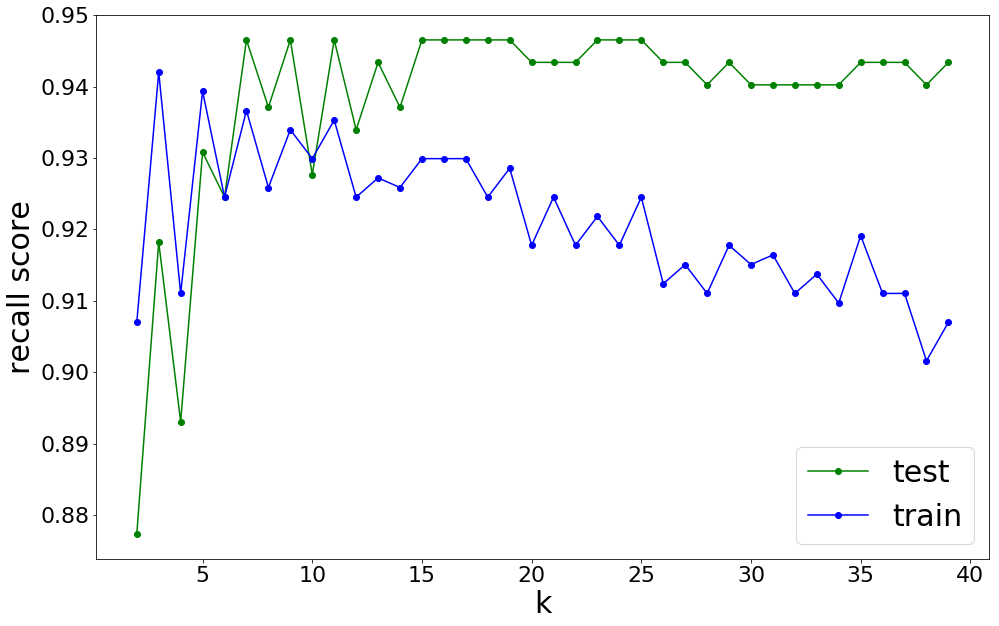

In [22]:
# mengatur ukuran gambar
plt.figure(figsize=(16,10))

# menumpuk beberapa garis dalam satu jendela
plt.plot(range(2,40),test_score,'o-',color='green')
plt.plot(range(2,40),train_score,'o-',color='blue')

# menambahkan keterangan
plt.legend(['test','train'],fontsize=30)

# mangatur label pada sumbu x
plt.xlabel("k",fontsize=30)

# mangatur label pada sumbu y
plt.ylabel("recall score",fontsize=30)

# mengatur ukuran huruf pada nilai-nilai di smbu x
plt.xticks(fontsize=22)

# mengatur ukuran huruf pada nilai-nilai di smbu y
plt.yticks(fontsize=22)

plt.show()

# Menentukan Banyaknya Tetangga (K)  Menggunakan Validasi Silang

In [23]:
# library untuk melakukan perintah validasi silang secara stratified
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [24]:
# validasi silang dengan startifikasi 
from sklearn.model_selection import StratifiedKFold

# validasi silang tanpa startifikasi
from sklearn.model_selection import KFold

In [25]:
skfold = StratifiedKFold(n_splits=5)
kfold = KFold(n_splits=5)

In [26]:
# library yang digunakan untuk menggabungkan standardisasi dalam metode KNN
from imblearn.pipeline import Pipeline

In [27]:
# menggabungkan standardisasi dan knn
pipe_knn = Pipeline([("scaler",StandardScaler()),("knn",KNeighborsClassifier(n_neighbors=5,metric = 'euclidean'))])

In [28]:
# menghitung skor akurasi validasi silang (5 lipat) dan rataannya
score = cross_val_score(pipe_knn,x_train,y_train,cv=skfold)
print("akurasi validasi silang : \n",score,"\n")
print("rataan akurasi validasi silang : \n",score.mean())

akurasi validasi silang : 
 [ 0.9636099   0.97230321  0.9620438   0.95912409  0.96642336] 

rataan akurasi validasi silang : 
 0.964700869196


In [29]:
# menghitung skor sensitivitas validasi silang (5 lipat) dan rataannya
score = cross_val_score(pipe_knn,x_train,y_train,cv=skfold,scoring='recall')
print("skor sensitivitas validasi silang : \n",score,"\n")
print("rataan skor sensitivitas validasi silang : \n",score.mean())

skor sensitivitas validasi silang : 
 [ 0.93288591  0.96644295  0.90540541  0.92567568  0.91216216] 

rataan skor sensitivitas validasi silang : 
 0.928514420461


In [30]:
# mencari skor sensitivitas pada masing-masing k menggunakan validasi silang berstrata
skfold_score = []
for k in range(2,40):
    pipe_knn_k = Pipeline([("scaler",StandardScaler()),("knn",KNeighborsClassifier(n_neighbors=k,metric = 'euclidean'))])
    skfold_score.append(cross_val_score(pipe_knn_k,x_train,y_train,cv=skfold,scoring='recall').mean())

In [31]:
# mencari skor sensitivitas pada masing-masing k menggunakan validasi silang
kfold_score = []
for k in range(2,40):
    pipe_knn_k = Pipeline([("scaler",StandardScaler()),("knn",KNeighborsClassifier(n_neighbors=k,metric = 'euclidean'))])
    kfold_score.append(cross_val_score(pipe_knn_k,x_train,y_train,cv=kfold,scoring='recall').mean())

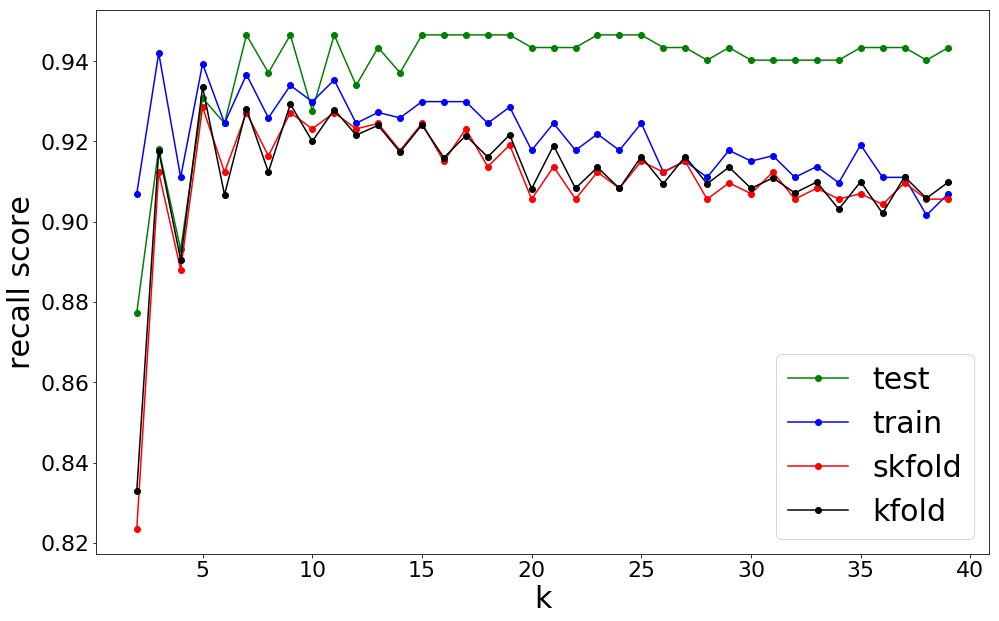

In [32]:
# mengatur ukuran gambar
plt.figure(figsize=(16,10))

# menumpuk beberapa grafik dalam satu jendela
plt.plot(range(2,40),test_score,'o-',color='green')
plt.plot(range(2,40),train_score,'o-',color='blue')
plt.plot(range(2,40),skfold_score,'o-',color='red')
plt.plot(range(2,40),kfold_score,'o-',color='black')

# menambahkan keterangan
plt.legend(['test','train','skfold','kfold'],fontsize=30)

# mangatur label pada sumbu x
plt.xlabel("k",fontsize=30)

# mangatur label pada sumbu y
plt.ylabel("recall score",fontsize=30)

# mengatur ukuran huruf pada nilai-nilai di smbu x
plt.xticks(fontsize=22)

# mengatur ukuran huruf pada nilai-nilai di smbu y
plt.yticks(fontsize=22)

plt.show()

In [33]:
# mencari k dengan skor senstitvitas terbaik menggunakan validasi silang berstrata

# inisialisasi skor awal
best_score_cv = 0

# k berikisar dari 3 hingga 40
for k in range(2,40):
    pipe_knn_k = Pipeline([("scaler",StandardScaler()),("knn",KNeighborsClassifier(n_neighbors=k,metric = 'euclidean'))])
    
    score=cross_val_score(pipe_knn_k,x_train,y_train,cv=skfold,scoring='recall').mean()
    
    if score>best_score_cv:
        best_score_cv = score
        best_k = k

In [34]:
print("banyaknya tetangga : ",best_k)
print("skor sensitivitas tertinggi : ",best_score_cv)

banyaknya tetangga :  5
skor sensitivitas tertinggi :  0.928514420461


# Finalisasi Metode KNN

In [35]:
clf_final = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')
clf_final.fit(x_train_std,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [36]:
print("Akurasi Sesudah Pemilihan K", accuracy_score(y_test,clf_final.predict(x_test_std)),"\n")
print("Recall Sesudah Pemilihan K", recall_score(y_test,clf_final.predict(x_test_std)),"\n")
print("Confusion Matrix Sesudah Pemilihan K :\n", confusion_matrix(y_test,clf_final.predict(x_test_std)),"\n")
print("Classification Report Sesudah Pemilihan K:\n", classification_report(y_test,clf_final.predict(x_test_std)),"\n")

Akurasi Sesudah Pemilihan K 0.969387755102 

Recall Sesudah Pemilihan K 0.930817610063 

Confusion Matrix Sesudah Pemilihan K :
 [[1129   23]
 [  22  296]] 

Classification Report Sesudah Pemilihan K:
              precision    recall  f1-score   support

          0       0.98      0.98      0.98      1152
          1       0.93      0.93      0.93       318

avg / total       0.97      0.97      0.97      1470
 



In [37]:
print("Akurasi Sebelum Pemilihan K", accuracy_score(y_test,clf.predict(x_test_std)),"\n")
print("Recall Sebelum Pemilihan K", recall_score(y_test,clf.predict(x_test_std)),"\n")
print("Confusion Matrix Sebelum Pemilihan K:\n", confusion_matrix(y_test,clf.predict(x_test_std)),"\n")
print("Classification Report Sebelum Pemilihan K:\n", classification_report(y_test,clf.predict(x_test_std)),"\n")

Akurasi Sebelum Pemilihan K 0.978231292517 

Recall Sebelum Pemilihan K 0.943396226415 

Confusion Matrix Sebelum Pemilihan K:
 [[1138   14]
 [  18  300]] 

Classification Report Sebelum Pemilihan K:
              precision    recall  f1-score   support

          0       0.98      0.99      0.99      1152
          1       0.96      0.94      0.95       318

avg / total       0.98      0.98      0.98      1470
 



menampilkan decision boundary

In [38]:
# library untuk menampilkan decision boundary
import mglearn

In [39]:
knn_5 = KNeighborsClassifier(n_neighbors=5,metric = 'euclidean')

In [40]:
# data yang digunakan untuk standardisasi peubah
sc = StandardScaler()
# data
sc.fit(wine[FITUR])

# standardisasi data
X = sc.transform(wine[FITUR])

knn_5.fit(X,wine['label'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

decision boundary tanpa titik amatan

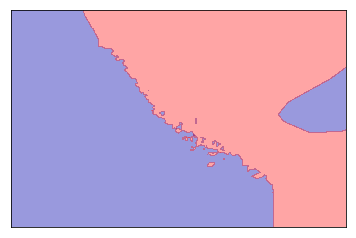

In [41]:
mglearn.plots.plot_2d_separator(knn_5,X,fill=True,eps=0.5,alpha=0.4)

plt.show()

decision boundary dengan titik amatan

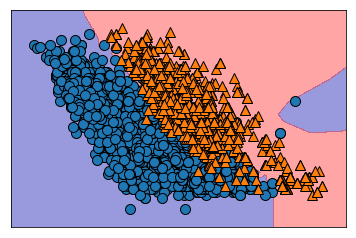

In [42]:
mglearn.plots.plot_2d_separator(knn_5,X,fill=True,eps=0.5,alpha=0.4)
mglearn.discrete_scatter(X[:,0],X[:,1],wine['label'])

plt.show()

____

# MENYIMPAN DAN MEMUAT HASIL 

_____

In [43]:
# library untuk menyimpan dan memuat model
import pickle

In [44]:
#menyimpan model
filename = 'knn.sav'
pickle.dump(clf_final, open(filename, 'wb'))

In [45]:
# memuat model
loaded_model = pickle.load(open(filename, 'rb'))

# manimplkan skor pada model yang telah dimuat
result = loaded_model.score(x_test_std, y_test)
print("Akurasi pada model yang telah dimuat : \n",result)

Akurasi pada model yang telah dimuat : 
 0.969387755102


In [46]:
print("Recall pada Model yang Dimuat", recall_score(y_test,clf.predict(x_test_std)),"\n")
print("Confusion Matrix Sebelum Pemilihan K:\n", confusion_matrix(y_test,clf.predict(x_test_std)),"\n")
print("Classification Report Sebelum Pemilihan K:\n", classification_report(y_test,clf.predict(x_test_std)),"\n")

Recall pada Model yang Dimuat 0.943396226415 

Confusion Matrix Sebelum Pemilihan K:
 [[1138   14]
 [  18  300]] 

Classification Report Sebelum Pemilihan K:
              precision    recall  f1-score   support

          0       0.98      0.99      0.99      1152
          1       0.96      0.94      0.95       318

avg / total       0.98      0.98      0.98      1470
 

